# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `plt.legend()` command, which automatically creates a legend for any labeled plot elements:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

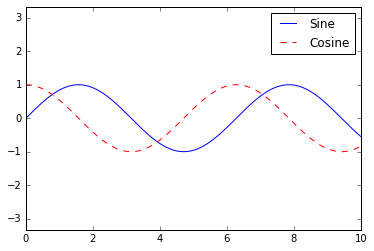

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label="Cosine")
ax.axis('equal')
leg = ax.legend();

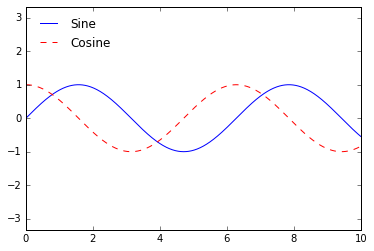

In [4]:
# Specify loaction and turn off the frame
ax.legend(loc='upper left', frameon=False)
fig

We can use the `ncol` command to specify the number of columns in the legend:

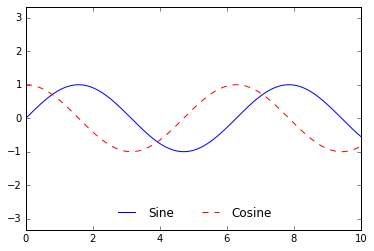

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

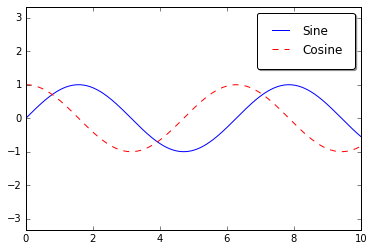

In [6]:
# Using rounded box (fancybox)
ax.legend (fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Choosing Elements for the Legend

As we have already seen, the legend includes all labeled elements by default. If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands. The `plt.plot()` command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to `plt.legend()` will tell it which to identify, along with the labels we'd like to specify:

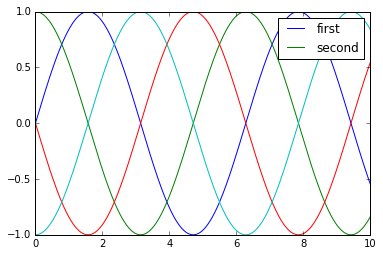

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

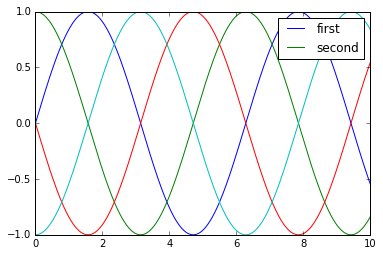

In [8]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Notice that by default, the legend ignores all elemnets without a `label` attribute set.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization. For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this. Here is an example where we'll use the size of points to indicate populations of California cities. We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

In [9]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


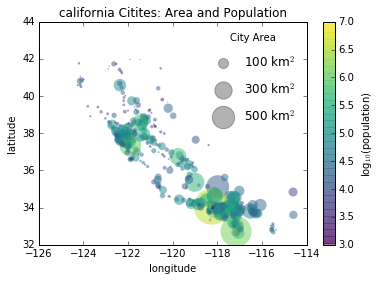

In [10]:
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
           c=np.log10(population), cmap='viridis',
           s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
# Set colorbar
plt.colorbar(label='log$_{10}$(population)')
# Set colorbar limit
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
    

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
    
plt.title('california Citites: Area and Population');    

## Multiple Legends

If you try to create a second legend using `plt.legend()` or `ax.legend()`, it will simply override the first one. We can work around this by creating a new legend artist from scratch, and then using the lower-level `ax.add_artist()` method to manually add the second artist to the plot:

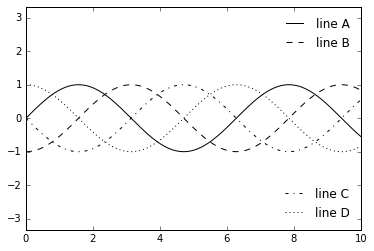

In [14]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                    styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
         loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

In [15]:
ax.legend??